<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> Regularization </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<br>
<hr>

## Project 6: Predicting Boston House Price with the following algorithms using python
- <Strong>Polynomial Regression</Strong>
- <Strong>Ridge Regression</Strong>
- <Strong>Lasso Regression</Strong>

## **Objective:

1. **Introduction Regularization in Machine Learning**
    - **Regularization** refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. using regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it. The commonly used regularization techniques are: 
        - Lasso Regularization – L1 Regularization
        - Ridge Regularization – L2 Regularization
        - Elastic Net Regularization – L1 and L2 Regularization
2. **Lasso**
    - A regression model which uses the L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression. Lasso Regression adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function(L). Lasso regression also helps us achieve feature selection by penalizing the weights to approximately equal to zero if that feature does not serve any purpose in the model.
3. **Ridge**
    - A regression model that uses the L2 regularization technique is called Ridge regression. Ridge regression adds the “squared magnitude” of the coefficient as a penalty term to the loss function(L).
4. **Elastic Net Regression**
    - This model is a combination of L1 as well as L2 regularization. That implies that we add the absolute norm of the weights as well as the squared measure of the weights. With the help of an extra hyperparameter that controls the ratio of the L1 and L2 regularization.
    - Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. **Lasso**) and less close to 0 (i.e. **Ridge**).
5. **Performance comparison of Polynomial regression and Regularization algorithms in prediction house price**

### **The Boston_house_price dataset

 **Variables in order:**
 
- <b>CRIM: </b>     per capita crime rate by town
 
- <b>ZN: </b>       proportion of residential land zoned for lots over 25,000 sq.ft.
 
- <b>INDUS: </b>    proportion of non-retail business acres per town
 
- <b>CHAS: </b>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
- <b>NOX: </b>      nitric oxides concentration (parts per 10 million)
 
- <b>RM: </b>       average number of rooms per dwelling
 
- <b>AGE: </b>      proportion of owner-occupied units built prior to 1940
 
- <b>DIS: </b>      weighted distances to five Boston employment centres
 
- <b>RAD: </b>      index of accessibility to radial highways
 
- <b>TAX: </b>      full-value property-tax rate per 10,000
 
- <b>PTRATIO: </b>  pupil-teacher ratio by town
 
- <b>B: </b>        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
- <b>LSTAT: </b>    % lower status of the population
 
- <b>Price: </b>     Median value of owner-occupied homes in 1000's

# Step 1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from summarytools import dfSummary

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Read Data & Overview

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
Boston_house_price_data = pd.read_csv('Boston_house_price.csv', delimiter="\s+", names=column_names)

In [3]:
Boston_house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
Boston_house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dfSummary(Boston_house_price_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CRIM[float64],Mean (sd) : 3.6 (8.6)min < med < max:0.0 < 0.3 < 89.0IQR (CV) : 3.6 (0.4),504 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3XwW7aQBRG4TuF0AEqG0RrdmzZdcGSh+jD5iG85T2QDLKFY8cITXfdVC2xHSv5k/Otmcssjsa6LoRgwHv35a0vALzE+N4PnHNTM5t0nN+EEKqOZ4E//huqc266Wq1+RVG07DK8KIqzc+6RWNHXvRd1EkXRcr/fV3Ec120G53nu0zRdZlk2MTNCRS93P/1mZnEc10mSPHWYP+1wBvgLyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjIccfrvdHswscs51HdGEEKpXvBJEDRZqWZYP1+v152azGY1Go7rLjKIozs65R2LFYKE2TTP23s92u129Xq/Pbc/nee7TNF1mWTYxM0L95Ab99JuZzefzOkmSp47Hp696GchimYKEwV/UPnouYyxiH8i7DbXvMsYi9rG8KNQ8z33bwZfLxZuZlWXpj8fjrO350+n0zXs/2263brFYPLc5W1XV18Ph8CPLsu/OuaLtf+NNPIcQ/vkg/QZ/9H9FrqlyrQAAAABJRU5ErkJggg=="">",0(0.0%)
2,ZN[float64],Mean (sd) : 11.4 (23.3)min < med < max:0.0 < 0.0 < 100.0IQR (CV) : 12.5 (0.5),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3YP2/aQBjH8ef4V5O65yAqsrF0yFCpQ0YvfQd9sVm7dSBSt2Rnj6KQYATBxXLcKVWlSiE+B8Ev/X5mnuNkvtjyuaqqDDh0rX1vAHiJzrYPOOf6ZtYLXH9TVdU6cBb449lQnXP94XD4zXs/CFl8sVjcO+fOiRVNbbuj9rz3gzRN10mS5HUWzrIsmkwmg9ls1jMzQkUjWx/9ZmZJkuSj0eghYP1+wAzwD16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaGz7w08xznXN7Ne4Pimqqr1a+4H+3OwoTrn+sPh8Jv3fhAyv1gs7p1z58T6NhxsqGbW894P0jRdJ0mS1xnMsiyaTCaD2WzWMzNCfQMOOVQzM0uSJB+NRg8Bo/1X3wz2hpcpSCBUSDj4R3+osiy7Zuadc6FL/HenBg1PWcx2eM12GmrDWPzj42M3ZHC1WnWLovgyHo/b7Xa71ovYk/l8vnTOfTezkHm5yJuespjt9prtLNSmsRRFEZVl+TnP8x9mVutlarPZdKIoOjo7O8tPTk7u63739fX1h4uLi6/j8fhjyN4b/mAtM3sMmGs67+M4HqVpuqh7ymLW/JptO058UahZlkV1v/ju7i6Ooujo9PTUHR8f/6o7f3t7G02n06Msy97f3Nxs6swul8va+/1bURSd0L3P5/P48vIy6Acry7K7Wq0+xXE8bbVaRb1dN5t/ujEURfHTAv5gTa7Zer1+d3V19exx4m+QwfBRWCqPkwAAAABJRU5ErkJggg=="">",0(0.0%)
3,INDUS[float64],Mean (sd) : 11.1 (6.9)min < med < max:0.5 < 9.7 < 27.7IQR (CV) : 12.9 (1.6),76 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC1klEQVR4nO3dsW7aQBjA8e8KgQsgG4REtqwMlTpk5CH6sH2EDDxBViY2FEBGoaGAoVMqVQ0B39nNfcf/tx+xdH9ZtnNnm+PxKEDovnz2AQCXqH/2AeBvxphbEWl4/MT2eDy+lnU8oSDUgBhjbvv9/vckSXquv7FarZbGmB+xxUqoYWkkSdIbjUavaZpuig7OssyOx+PefD5viAiholppmm4Gg8FPx+G3pR5MILiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoEPTqKc9FxFEuIL5WwYbqu4g41gXE16rSUD3PiEmn0xmMRqNV0UXEMS8gvlaVhep7RtztdjbP86/NZvPRcRFxlAuIr1WVZ1SvbRXT6bT39PTU2u/3tSoODrpUfo3quq1iuVxyRsQfPJ6CCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFswunPfY9JYfD4cZhHPCPD0P12ff0tudps9k8iojrhxMAETl/RnXe98SeJ5Tpoj1TLvue2POEMnEzBRWCfVMK3OR5fiMiiTHGZXiwr0GKNlTPCRMJeNJOWa/XN7vd7tv9/X2tVqsVfpdCyK9BijJU3wkTCXvSTtlut3Vrbevh4WFzd3e3LDI29NcgRRmqz4SJhD9p57TbbddvqQZ7AxxlqG88Jkwk4Em7Rtz1QwVChQqEChUIFSoQKlQgVKhAqFCBUKFC1A/8fcS6uEMrQn1HzIs7tCLUd8S8uEMrQv1AjIs7tCJUlKbKb9cSKkpR9bdrCRVlcd6xfMl1PaGiVK5fapQz1/WEWgGPZ7C8XeYEQi2ZzzNY3i5z2kWhZllmi/7wy8uLFRFZr9d2Npu1/uf4z/zbi8WiY61tDYdD0+12fxUZ+/z8bCeTSSvLsvZsNtsWGSvid9xZltk8z+vi/t+45HA41F1auWTMbx/bcEmt0Jy1AAAAAElFTkSuQmCC"">",0(0.0%)
4,CHAS[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QA

In [6]:
Boston_house_price_data.shape

(506, 14)

**Results:**
- Rows: 506
- Columns: 14
- Missing values: 0 (It's Looks that No missing values!)
- Duplicates: 0

# Step 3: Preprocessing

### 🟣Check Duplicates

In [7]:
Boston_house_price_data.duplicated().sum()

0

**Result:** No duplicated data!

### 🟣Check and Remove Outliers

- **Boxplot for checking outliers**

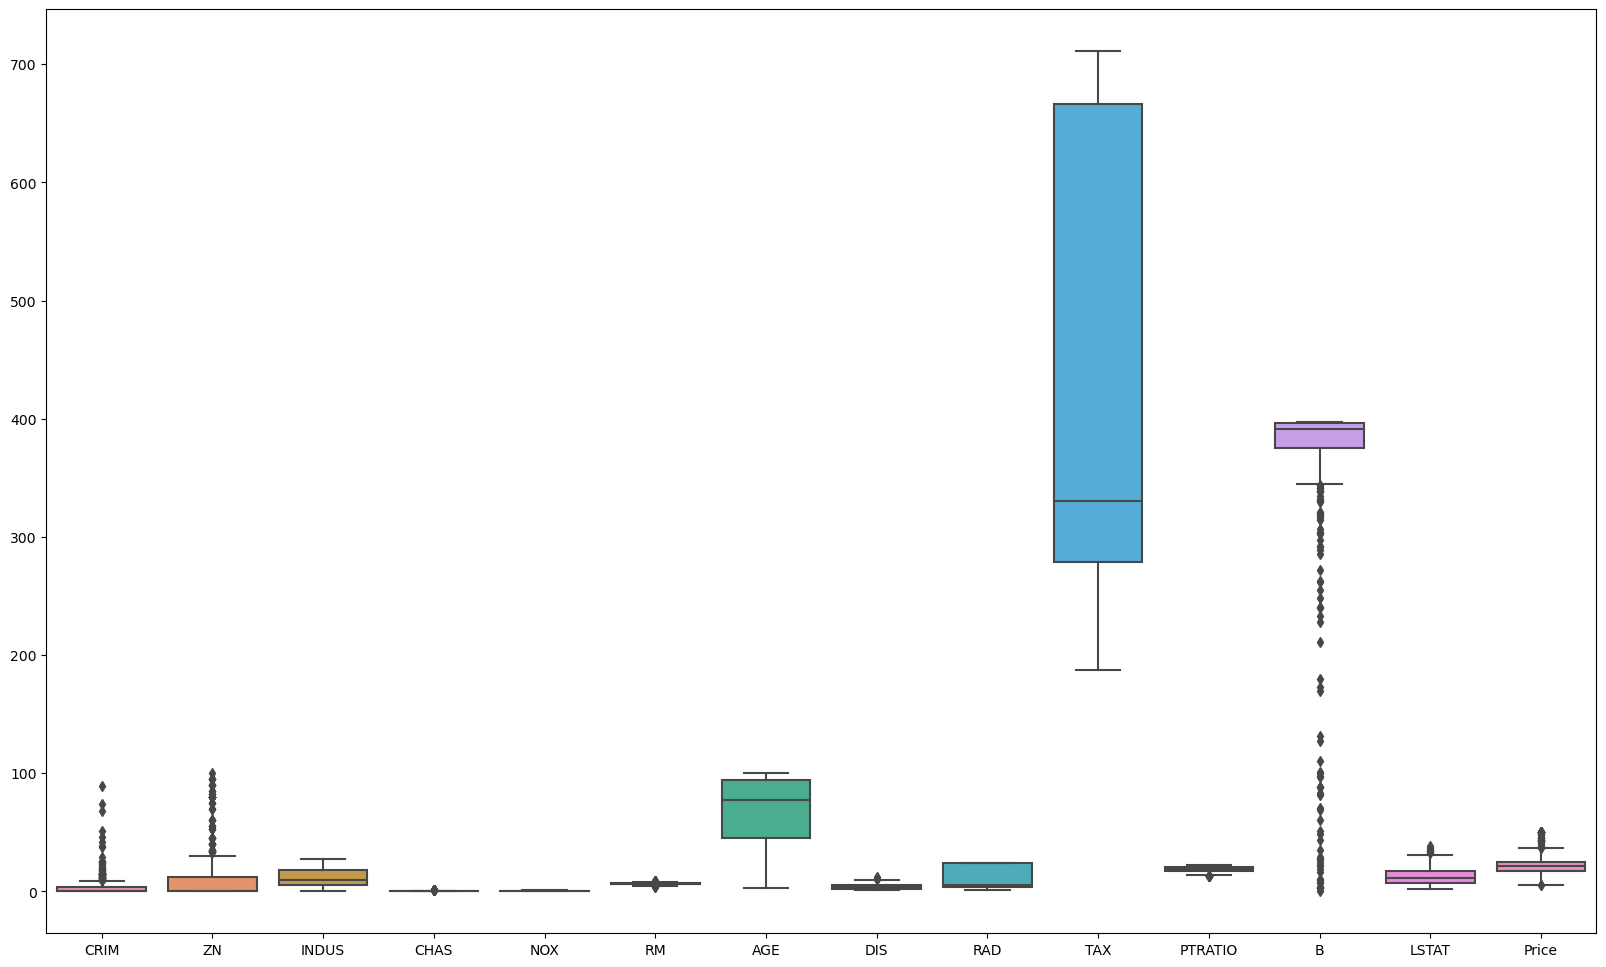

In [8]:
fig = plt.figure(figsize=(20, 12))
sns.boxplot(data=Boston_house_price_data)
plt.show()

- **Detect outliers in data with IQR**

In [9]:
#function for detect outliers in data, base on IQR criterion
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data , [75, 25])
    iqr = q3 - q1
    for i in data:
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier 

- **Check outliers**

In [10]:
column_names = list(Boston_house_price_data.columns)
df = pd.DataFrame()
for name in column_names:
    df[name] = outlier_func(Boston_house_price_data[name])

- **Objective: Find the sum of outliers in each record**

In [11]:
data_rowsum = df.sum(axis = 1)
data_rowsum

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64

- **Show the Index list of records countains outliers**

In [12]:
list(data_rowsum[data_rowsum >= 3].index)

[162, 163, 195, 203, 204, 257, 262, 267, 283, 367, 374, 384, 412, 414, 438]

- **Drop outliers**

In [13]:
n_outlier_feature = 3 
for j in range(len(Boston_house_price_data)):
    if data_rowsum[j] >= n_outlier_feature :
        Boston_house_price_data = Boston_house_price_data.drop(j)

In [14]:
Boston_house_price_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
Boston_house_price_data.shape

(491, 14)

**Result:** 15 records dropped!

### 🟣Check Missing Values

In [16]:
Boston_house_price_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

**Result:** No missing values!

# Step 4: Visualization

### 🟣 Draw displot

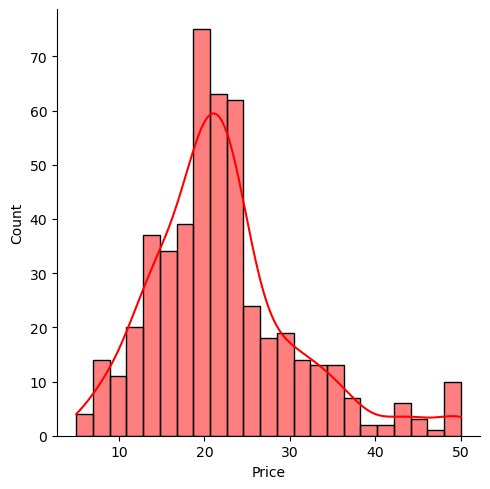

In [17]:
sns.displot(data=Boston_house_price_data, x='Price', kde=True, color='red')
plt.show()

### 🟣 Draw scatter plot

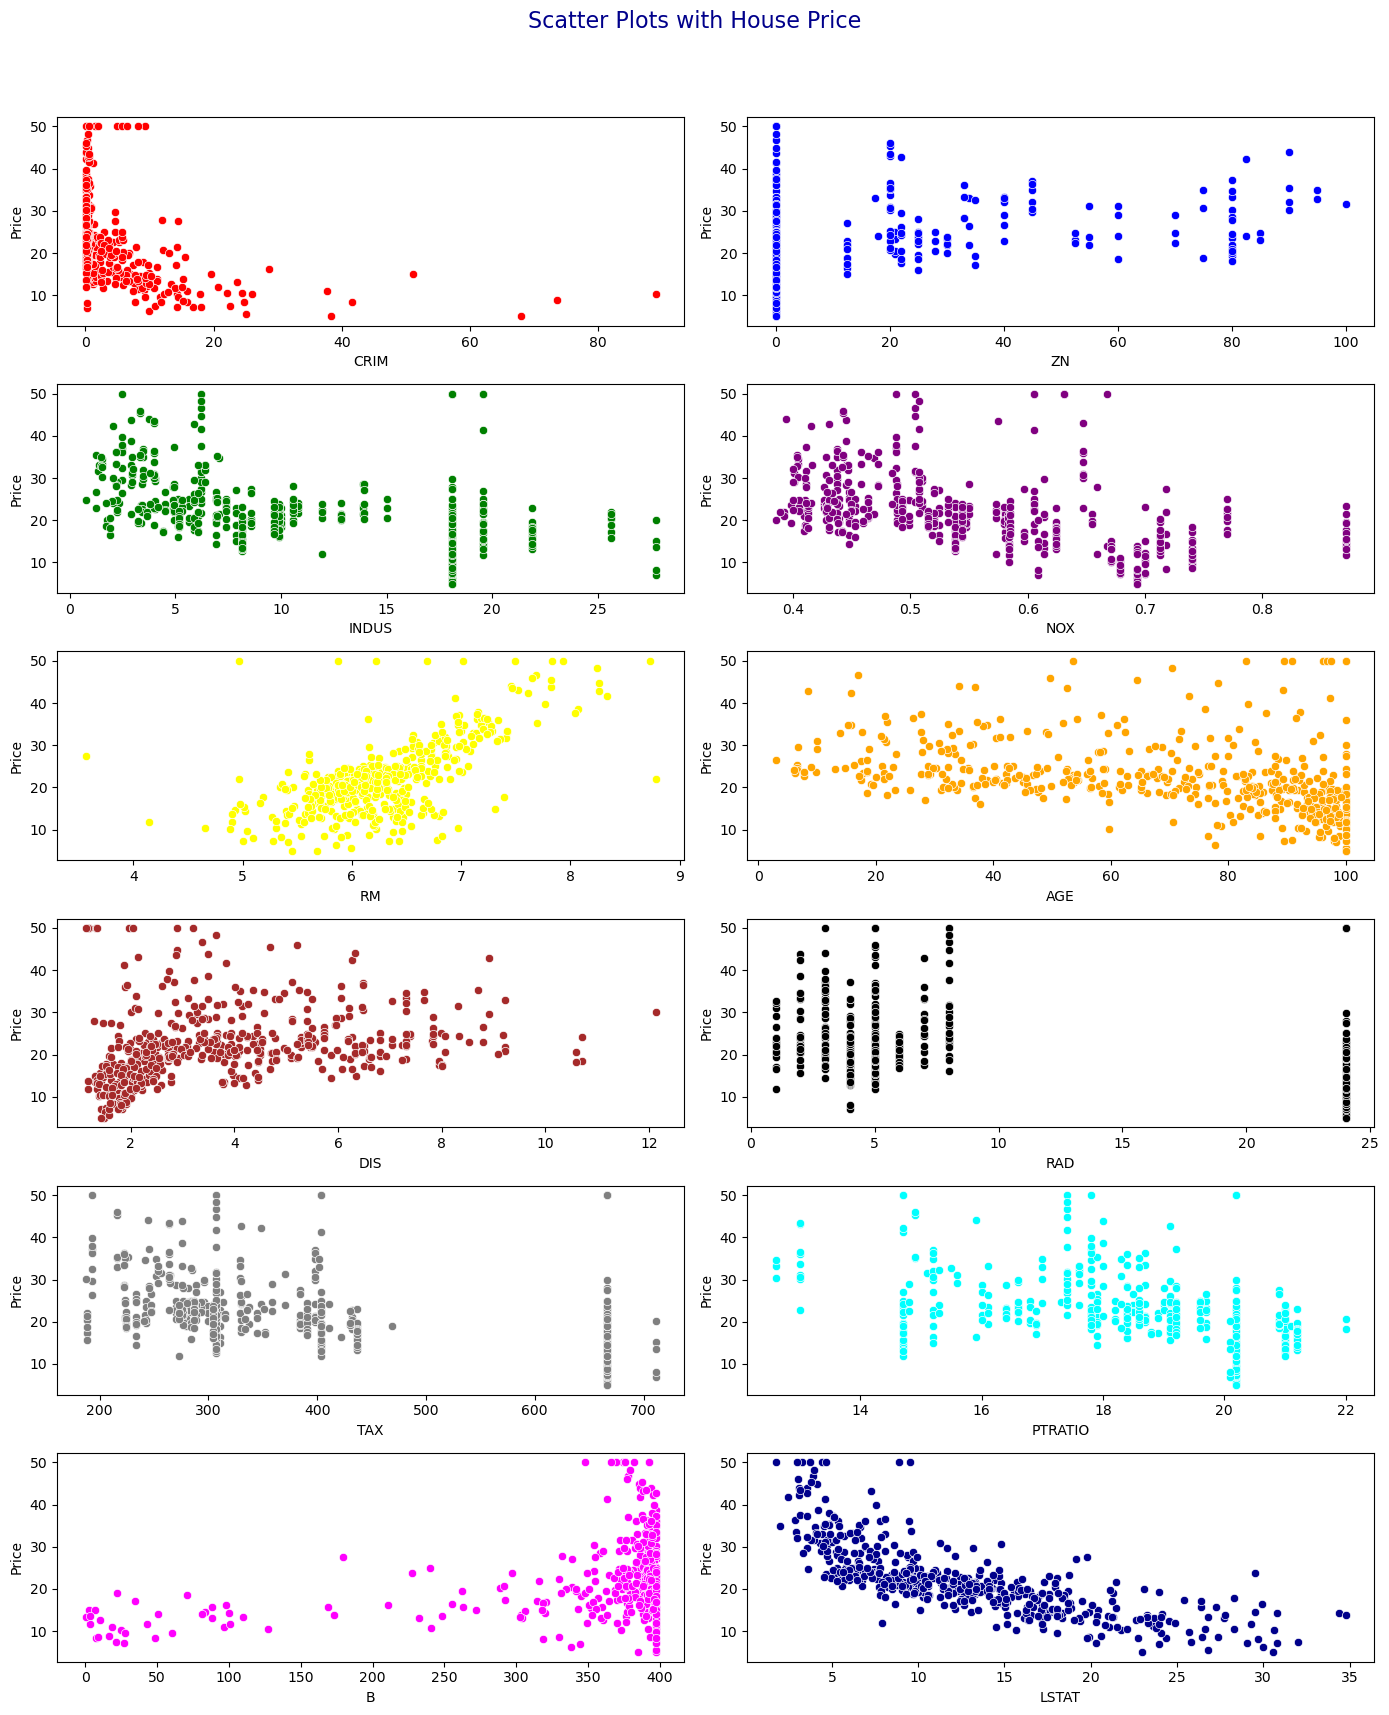

In [18]:
# Create scatter plots to explore the relationships between these variables and the house price.
# It will help us understand which factors might be influencing house prices more significantly:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18))
fig.suptitle('Scatter Plots with House Price', fontsize=16, color='darkBlue')

# Scatter plot for each variable (without CHAS column) against the house price
sns.scatterplot(data=Boston_house_price_data, x='CRIM', y='Price', ax=axes[0, 0], c='red')
sns.scatterplot(data=Boston_house_price_data, x='ZN', y='Price', ax=axes[0, 1], c='blue')
sns.scatterplot(data=Boston_house_price_data, x='INDUS', y='Price', ax=axes[1, 0], c='green')
sns.scatterplot(data=Boston_house_price_data, x='NOX', y='Price', ax=axes[1, 1], c='purple')
sns.scatterplot(data=Boston_house_price_data, x='RM', y='Price', ax=axes[2, 0], c='yellow')
sns.scatterplot(data=Boston_house_price_data, x='AGE', y='Price', ax=axes[2, 1], c='orange')
sns.scatterplot(data=Boston_house_price_data, x='DIS', y='Price', ax=axes[3, 0], c='brown')
sns.scatterplot(data=Boston_house_price_data, x='RAD', y='Price', ax=axes[3, 1], c='black')
sns.scatterplot(data=Boston_house_price_data, x='TAX', y='Price', ax=axes[4, 0], c='gray')
sns.scatterplot(data=Boston_house_price_data, x='PTRATIO', y='Price', ax=axes[4, 1], c='cyan')
sns.scatterplot(data=Boston_house_price_data, x='B', y='Price', ax=axes[5, 0], c='magenta')
sns.scatterplot(data=Boston_house_price_data, x='LSTAT', y='Price', ax=axes[5, 1], c='darkblue')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 🟣 Correlation Matrix

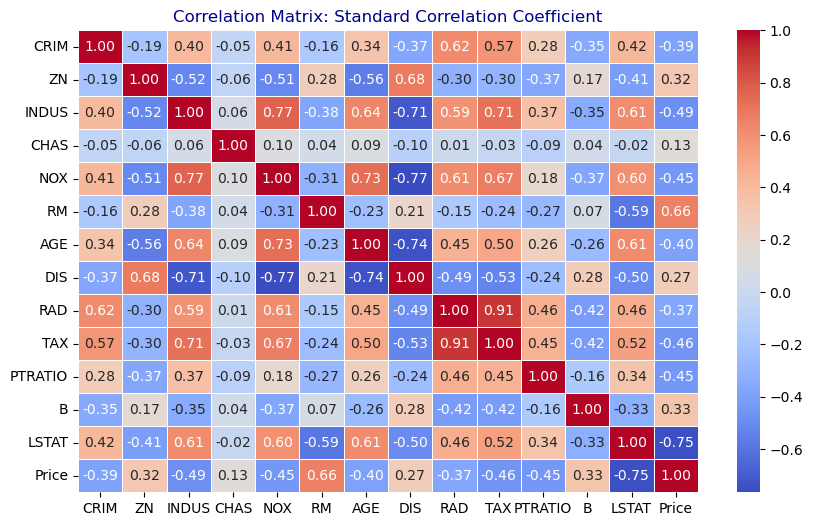

In [19]:
# it would be beneficial to perform a correlation analysis to quantify the relationships between these variables,
# especially how each one correlates with the house price:

# Correlation Matrix:>>>>>>>>> standard correlation coefficient
correlation_matrix = Boston_house_price_data.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Standard Correlation Coefficient', color='darkblue')
plt.show()

**Results:**
<br>
**The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:**
 1. LSTAT: This shows a  strong negative correlation with house price (- 0.75), implying that LSTAT is a strong predictor of price in this dataset.
2. RM: This shows a  strong positive correlation with house price (+ 0.66), implying that RM is a strong predictor of price in this dataset.
3. INDUS: Displays a moderate negative downward correlation with house price (- 0.49).
4. TAX: Displays a moderate negative downward correlation with house price (- 0.46).
5. NOX and PTRATIO: Displays a moderate negative downward correlation with house price (- 0.45).
6. The rest of the variables have a weak downward relationship with house price.

# Step 5: Determine X, y

### 🟣 Determine Features & Target

In [20]:
X = Boston_house_price_data.drop('Price', axis=1)
y = Boston_house_price_data['Price']

### 🟣Feature Scaling
The bigness or smallness of each feature is not the basis and criterion for the selection or role of that variable in modeling, and all variables will be important in terms of weight or coefficients created by the model. For this purpose, we use scaling.

In [21]:
sc = StandardScaler()
X_scale = sc.fit_transform(X) 
X_scaling = pd.DataFrame(X_scale) 
#X.columns
X_scaling.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_scaling

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.410198,0.317633,-1.294728,-0.264039,-0.136392,0.478742,-0.112234,0.125108,-0.978919,-0.666238,-1.533049,0.433451,-1.121356
1,-0.407697,-0.482607,-0.596579,-0.264039,-0.732282,0.235811,0.375720,0.541156,-0.863350,-0.988956,-0.341422,0.433451,-0.507864
2,-0.407699,-0.482607,-0.596579,-0.264039,-0.732282,1.440999,-0.258264,0.541156,-0.863350,-0.988956,-0.341422,0.387653,-1.261456
3,-0.407094,-0.482607,-1.313795,-0.264039,-0.827279,1.146012,-0.803205,1.060610,-0.747782,-1.108482,0.087564,0.407907,-1.422203
4,-0.402722,-0.482607,-1.313795,-0.264039,-0.827279,1.381055,-0.504022,1.060610,-0.747782,-1.108482,0.087564,0.433451,-1.069740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,-0.403487,-0.482607,0.116237,-0.264039,0.165871,0.507136,0.026673,-0.639250,-0.978919,-0.803692,1.183861,0.378200,-0.429702
487,-0.405556,-0.482607,0.116237,-0.264039,0.165871,-0.239008,0.297363,-0.729897,-0.978919,-0.803692,1.183861,0.433451,-0.516712
488,-0.403710,-0.482607,0.116237,-0.264039,0.165871,1.111307,0.806687,-0.786818,-0.978919,-0.803692,1.183861,0.433451,-1.024023
489,-0.397890,-0.482607,0.116237,-0.264039,0.165871,0.824208,0.746138,-0.681798,-0.978919,-0.803692,1.183861,0.394629,-0.900145


# Step 6: Polynomial Regression

## 🟣A: Polynomial Features (degree = 3)

In [22]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)

In [23]:
poly_3_feature = poly_3.fit_transform(X_scaling)

In [24]:
poly_3_feature.shape

(491, 559)

#### 🟣Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(poly_3_feature, y, test_size=0.3, random_state=101)

#### 🟣Create Model

In [26]:
Model_Poly_3 = LinearRegression()

#### 🟣Train the model

In [27]:
Model_Poly_3.fit(X_train, y_train)

LinearRegression()

In [28]:
Model_Poly_3.coef_

array([-1.48603830e+01,  1.35158190e+01,  2.16530321e+00,  2.61645904e-03,
        1.07918040e+00,  8.18535230e+00, -9.72122309e+00, -5.52596119e+00,
        1.34246563e+01, -4.24723771e+00,  8.96805510e+00,  1.23117351e+01,
        4.48338128e+00,  4.70732787e+00,  3.36962765e+00, -8.84828300e+00,
        3.95710098e+00, -8.35600985e+00,  5.89441522e+00, -7.72476110e+00,
        3.48816586e+01,  1.13103073e+01,  9.06674462e+00, -9.91221960e+00,
        1.85928121e+01,  1.72897014e+01, -2.28204724e+00, -9.54388658e+00,
       -3.64465685e+00, -3.52730663e+00,  7.41726538e+00,  4.73791011e+00,
        7.48152434e-01, -1.22053093e+01, -4.01961115e+00,  3.50887870e+00,
       -2.73453454e+01, -7.32136068e+00, -8.06113632e+00, -4.88666037e-01,
       -5.69979492e+00, -2.45551927e+00, -1.90130687e+00, -1.00557321e+01,
       -1.86760780e-01, -4.67456013e-01,  9.33948870e+00,  7.44078082e+00,
       -9.53486867e+00,  9.21850472e-03, -2.73231438e-01, -2.40180390e+00,
        2.53934741e+00,  

In [29]:
Model_Poly_3.intercept_

24.94439062933324

#### 🟣Predict with model

In [30]:
y_pred_3 = Model_Poly_3.predict(X_test)

#### 🟣Evaluate the model

In [31]:
MAE_3 = mean_absolute_error(y_test, y_pred_3)
MSE_3 = mean_squared_error(y_test, y_pred_3)
RMSE_3 = np.sqrt(MSE_3)

In [32]:
Error_polynomial_3 = pd.DataFrame([MAE_3, MSE_3, RMSE_3],
                                  index=['MAE', 'MSE', 'RMSE'],
                                  columns=['Polynomial_Regression(degree=3)'])
Error_polynomial_3

,Polynomial_Regression(degree=3)
MAE,13.535718
MSE,468.761536
RMSE,21.650901


## 🟣B: Determine hyperparameter: choose the best degree of polynomial

In [33]:
train_RMSE_list = []
test_RMSE_list = []

for d in range(1, 6):
    # feature poly
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_x = poly.fit_transform(X_scaling)
    
    # train and test
    X_train, X_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=101)
    
    # creat Model
    polymodel = LinearRegression()
    
    # train
    polymodel.fit(X_train, y_train)
    
    # predict
    y_train_pred = polymodel.predict(X_train)
    y_test_pred = polymodel.predict(X_test)
    
    # test, eval, RMSE
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [34]:
train_RMSE_list

[4.100653051129368,
 2.245285176866187,
 6.638646702848311e-13,
 4.431525922170558e-13,
 1.7911695963444981e-12]

In [35]:
test_RMSE_list

[5.208296317328724,
 3.902775006514836,
 21.65090149966671,
 22.565102874586138,
 26.156848202240536]

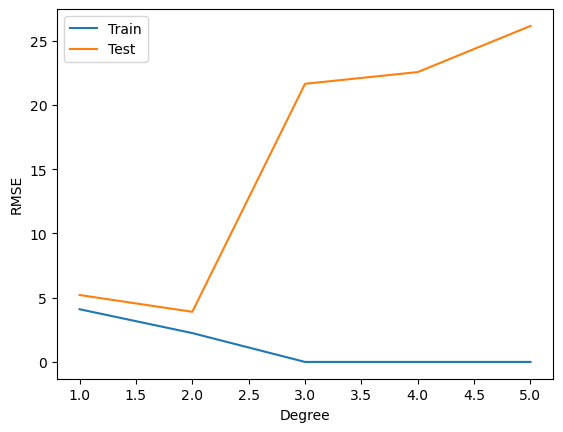

In [36]:
plt.plot(range(1, 6), train_RMSE_list[:6], label='Train')
plt.plot(range(1, 6), test_RMSE_list[:6], label='Test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

- **Result:** We select the best degree with 2

## 🟣C: Polynomial Features (the best degree = 2)

In [37]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)

In [38]:
poly_feature = poly_2.fit_transform(X_scaling)

In [39]:
poly_feature.shape

(491, 104)

#### 🟣Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

#### 🟣Create Model

In [41]:
Model_Poly = LinearRegression()

#### 🟣Train the model

In [42]:
Model_Poly.fit(X_train, y_train)

LinearRegression()

In [43]:
Model_Poly.coef_

array([  6.51470291,   8.40447353,   7.95064046,   0.11573245,
        -1.72249618,   3.06912428,  -2.2399463 ,  -3.29878685,
         4.85269237,  -8.25674736,   0.06788146,   1.21608792,
        -3.48689547,   0.20175012,  21.98645079,  17.51525748,
         5.23123905,  -1.298881  ,   0.18615864,  -1.22298068,
        -0.96046747,  17.12785967, -29.32108736,   1.33549097,
        -0.22635181,   1.27670873,  -0.56278395,  -0.79959775,
        -1.15528412,  -2.60818217,   0.77882702,   0.57700605,
        -0.29002711,  -0.16837001,   2.32679941,   0.03463199,
        -0.23451291,  -0.86105283,   1.30680683,  -1.17627912,
         2.11849374,   0.98063084,   0.56177065,   2.74533543,
        -0.21283741,   0.79546115,   0.06788395,   1.198402  ,
        -0.93877631,   0.40775725,  -0.76078876,  -1.0481615 ,
        -0.48561495,   0.68276646,  -0.69172058,   1.54670899,
        -0.78173938,   1.65621164,  -0.63985577,  -0.79974475,
         0.08765937,  -1.38941321,   1.69198509,   0.17

In [44]:
Model_Poly.intercept_

23.473089441363904

#### 🟣Predict with the model

In [45]:
y_pred = Model_Poly.predict(X_test)

#### 🟣Evaluate the model

In [46]:
MAE_2 = mean_absolute_error(y_test, y_pred)
MSE_2 = mean_squared_error(y_test, y_pred)
RMSE_2 = np.sqrt(MSE_2)

In [47]:
Error_polynomial_Reg_2 = pd.DataFrame([MAE_2, MSE_2, RMSE_2],
                                    index=['MAE', 'MSE', 'RMSE'],
                                    columns=['Polynomial_Regression(the best degree = 2)'])
Error_polynomial_Reg_2

,Polynomial_Regression(the best degree = 2)
MAE,2.764177
MSE,15.231653
RMSE,3.902775


In [48]:
pd.concat([Error_polynomial_3, Error_polynomial_Reg_2], axis=1)

,Polynomial_Regression(degree=3),Polynomial_Regression(the best degree = 2)
MAE,13.535718,2.764177
MSE,468.761536,15.231653
RMSE,21.650901,3.902775


***Result:** Performance of Polynomial Regression with degree 2 is better than with degree 3!

# Step 7: Regularization

## 7-1: Ridge Regression

### 🟣 Determine hyperparameter: choose the best alpha value
- **Ridge Regression (Coosing an alpha value with Cross-Validation)**

In [49]:
alphas = np.random.uniform(0, 10, 50)

In [50]:
#ridge_cv = RidgeCV(alphas=(0.1, 1, 10, 40), cv=5)
ridge_cv = RidgeCV(alphas=alphas, cv=5)

In [51]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([6.29222096, 4.13475464, 5.33491333, 5.09336446, 2.13558522,
       3.90285469, 0.6806465 , 6.0431285 , 6.05030461, 8.87880129,
       6.83929907, 0.379373  , 8.63471472, 2.4699725 , 3.49880215,
       9.75334347, 0.11472197, 0.84673258, 8.25770283, 8.26774889,
       3.12292379, 9.47993928, 3.36721217, 2.08923481, 1.76993957,
       1.81697367, 4.40827258, 0.50531741, 2.69758342, 1.5056622 ,
       5.74206034, 9.30190888, 0.84098736, 5.54292006, 7.22468906,
       6.8497456 , 9.96970815, 5.01187331, 8.14913043, 3.45675777,
       7.11084133, 7.52480907, 0.33772228, 1.58895496, 0.63416282,
       7.35921373, 1.21808086, 1.92608885, 2.12069781, 7.72289776]),
        cv=5)

In [52]:
y_pred_rcv = ridge_cv.predict(X_test)

In [53]:
mean_absolute_error(y_test, y_pred_rcv)

2.576258334182826

In [54]:
print("The best alpha is: ", ridge_cv.alpha_)

The best alpha is:  9.969708146248133


### 🟣 Create Ridge model

In [55]:
ridge_model = Ridge(alpha=ridge_cv.alpha_)

### 🟣Train the model 

In [56]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=9.969708146248133)

In [57]:
ridge_model.coef_

array([-1.63997990e-01,  1.28819252e-01, -1.13171966e-01,  8.67827523e-02,
       -9.31349212e-01,  2.96270784e+00, -1.31753140e+00, -2.26988799e+00,
        7.50427118e-01, -7.64524196e-01, -5.21509959e-01,  2.26405624e-01,
       -3.14087540e+00,  5.41581359e-02,  3.93614353e-02,  1.21257900e-01,
        1.69567783e+00, -4.87690236e-01,  2.65662920e-01, -5.22261353e-04,
        1.72817439e-01, -5.96290822e-01,  1.32555129e-01, -1.78350495e-01,
       -1.05263408e-01,  5.49147101e-01,  9.83376596e-02, -1.58199406e-01,
       -1.10237384e-01, -2.17718426e-01,  3.81694990e-01,  8.23013776e-02,
       -2.77143524e-01,  3.03032701e-02,  5.17683779e-01,  2.85892053e-01,
       -2.31955512e-01, -2.61288748e-01,  5.23624396e-01, -2.15773731e-01,
        7.38134486e-01,  4.29614898e-01,  2.44490598e-01,  5.90831394e-01,
        8.39806820e-02, -9.62895853e-02, -1.19056484e-01,  3.19695612e-01,
       -6.95418855e-01,  3.05759502e-01, -8.23623308e-01, -5.20611178e-01,
       -2.06531581e-01, -

In [58]:
ridge_model.intercept_

20.42562897741005

### 🟣Predict with the model

In [59]:
y_pred_r = ridge_model.predict(X_test)

### 🟣Evaluate the model

In [60]:
MAE_ridge = mean_absolute_error(y_test, y_pred_r)
MSE_ridge = mean_squared_error(y_test, y_pred_r)
RMSE_ridge = np.sqrt(MSE_ridge)

In [61]:
Error_Ridge = pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge'])
Error_Ridge

,Ridge
MAE,2.576258
MSE,15.335186
RMSE,3.916017


In [62]:
pd.concat([Error_polynomial_3, Error_polynomial_Reg_2, Error_Ridge], axis=1)

,Polynomial_Regression(degree=3),Polynomial_Regression(the best degree = 2),Ridge
MAE,13.535718,2.764177,2.576258
MSE,468.761536,15.231653,15.335186
RMSE,21.650901,3.902775,3.916017


In [63]:
list_ridge = ridge_model.coef_

In [64]:
def none_zero(list_ridge):
    count = 0
    for i in list_ridge:
        if i!=0:
            count+=1
    print(count)

In [65]:
none_zero(list_ridge)

104


## 7-2: Lasso Regression

### 🟣 Determine hyperparameter: choose the best alpha value
- **Lasso Regression (Coosing an alpha value with Cross-Validation)**

In [66]:
Lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=5)

In [67]:
Lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, eps=0.01)

In [68]:
y_pred_lasso = Lasso_cv.predict(X_test)

In [69]:
mean_absolute_error(y_test, y_pred_lasso)

2.8562901491719037

In [70]:
Lasso_cv.alphas_

array([13.76869962, 13.14289097, 12.54552629, 11.97531276, 11.43101632,
       10.91145898, 10.41551633,  9.94211504,  9.49023057,  9.05888494,
        8.64714464,  8.25411857,  7.87895614,  7.52084543,  7.17901139,
        6.85271425,  6.54124781,  6.243938  ,  5.96014138,  5.68924376,
        5.43065885,  5.18382702,  4.94821408,  4.72331012,  4.50862838,
        4.30370426,  4.10809426,  3.92137504,  3.74314249,  3.57301089,
        3.41061203,  3.25559445,  3.10762266,  2.96637641,  2.83155002,
        2.70285171,  2.58000292,  2.46273781,  2.35080257,  2.24395497,
        2.14196375,  2.04460819,  1.9516776 ,  1.86297084,  1.77829594,
        1.69746964,  1.62031703,  1.54667112,  1.47637253,  1.40926912,
        1.34521566,  1.28407353,  1.22571041,  1.16999998,  1.11682168,
        1.06606041,  1.01760632,  0.97135454,  0.92720498,  0.88506208,
        0.84483464,  0.8064356 ,  0.76978186,  0.73479409,  0.70139656,
        0.66951701,  0.63908642,  0.61003896,  0.58231175,  0.55

In [71]:
print("The best alpha is: ", Lasso_cv.alpha_)

The best alpha is:  0.13768699620844613


### 🟣Create Lasso model

In [72]:
Lasso_model = Lasso(alpha=Lasso_cv.alpha_)

### 🟣 Train the model

In [73]:
Lasso_model.fit(X_train, y_train)

Lasso(alpha=0.13768699620844613)

### 🟣Predict with model

In [74]:
y_pred_lasso = Lasso_model.predict(X_test)

### 🟣Evaluate the model

In [75]:
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)

In [76]:
Error_Lasso = pd.DataFrame([MAE_lasso, MSE_lasso, RMSE_lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso'])
Error_Lasso

,Lasso
MAE,2.856290
MSE,23.489109
RMSE,4.846556


In [77]:
pd.concat([Error_polynomial_3, Error_polynomial_Reg_2, Error_Ridge, Error_Lasso], axis=1)

,Polynomial_Regression(degree=3),Polynomial_Regression(the best degree = 2),Ridge,Lasso
MAE,13.535718,2.764177,2.576258,2.856290
MSE,468.761536,15.231653,15.335186,23.489109
RMSE,21.650901,3.902775,3.916017,4.846556


In [78]:
List_Lasso = Lasso_cv.coef_

In [79]:
none_zero(List_Lasso)

36


## 7-3: Elastic Net

### 🟣Create Model

In [80]:
Elastic = ElasticNetCV(l1_ratio=[0.1, 0.9], cv=5, max_iter=100)

**l1_ratio : float or list of float, default=0.5**
- Float between 0 and 1 passed to ElasticNet (scaling between l1 and l2 penalties)
    - For l1_ratio = 0 the penalty is an L2 penalty
    - For l1_ratio = 1 it is an L1 penalty.
    - For 0 < l1_ratio < 1 : the penalty is a combination of L1 and L2
- This parameter can be a list, in which case the different values are tested by cross-validation and the one giving the best prediction score is used.
- Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1].

### 🟣Train the model

In [81]:
Elastic.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.9], max_iter=100)

### 🟣Predict with model

In [82]:
y_pred_elastic = Elastic.predict(X_test)

### 🟣Evaluate the model

In [83]:
mean_absolute_error(y_test, y_pred_elastic)

2.606527545569821

In [84]:
MAE_Elastic = mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic = mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic = np.sqrt(MSE_Elastic)

In [85]:
Error_Elastic = pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE', 'MSE', 'RMSE'],columns=['ElasticNet'])
Error_Elastic

,ElasticNet
MAE,2.606528
MSE,17.650228
RMSE,4.201217


In [86]:
list_e = Elastic.coef_

In [87]:
none_zero(list_e)

56


In [88]:
Elastic.l1_ratio_

0.9

# 8. Final Results

In [89]:
Results = pd.concat([Error_polynomial_3, Error_polynomial_Reg_2, Error_Ridge, Error_Lasso, Error_Elastic], axis=1)
Results

,Polynomial_Regression(degree=3),Polynomial_Regression(the best degree = 2),Ridge,Lasso,ElasticNet
MAE,13.535718,2.764177,2.576258,2.856290,2.606528
MSE,468.761536,15.231653,15.335186,23.489109,17.650228
RMSE,21.650901,3.902775,3.916017,4.846556,4.201217


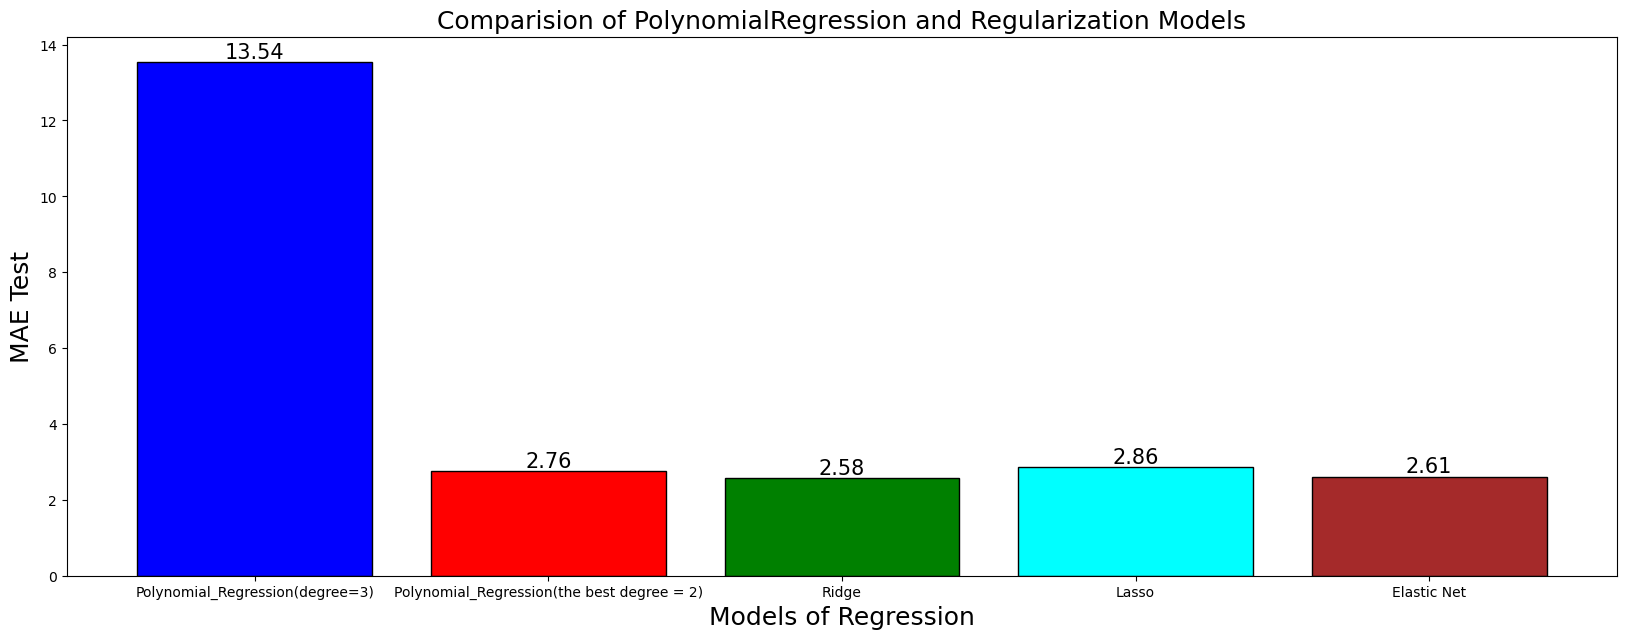

In [90]:
plt.figure(figsize=(20,7))
models_MAE = {'Polynomial_Regression(degree=3)':MAE_3,
              'Polynomial_Regression(the best degree = 2)':MAE_2,
              'Ridge':MAE_ridge,
              'Lasso': MAE_lasso,
              'Elastic Net': MAE_Elastic}
plt.bar(models_MAE.keys(), models_MAE.values(),
        color=('blue', 'red', 'green', 'cyan', 'brown'),
        edgecolor='black')
plt.xlabel('Models of Regression', fontsize=18)
plt.ylabel('MAE Test', fontsize=18)
plt.title('Comparision of PolynomialRegression and Regularization Models', fontsize=18)

# Adding annotations to the bars
for i, value in enumerate(models_MAE.values()):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=15)

plt.show()

**Final Results:**
- The performance of **Polynomial_Regression(the best degree = 2)** and **Ridge** Algorithms are bettar than other algorithms in this dataset.
- Especially, the error of the **Ridge regularization** algorithm is the lowest value in the MAE criterion (2.58). 

# Finished!
#### Nourzad